1. PROBLEM STATEMENT

Objective:
Predict whether a customer will become delinquent based on financial
and demographic attributes. This helps financial institutions reduce
credit risk and improve loan approval decisions.

2. IMPORT REQUIRED LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

3. LOAD DATASET

In [ ]:
df = pd.read_excel("/content/Delinquency_prediction_dataset.xlsx")

4. DATA UNDERSTANDING

In [ ]:
df.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [ ]:
df.describe()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure
count,500.000000,461.000000,498.000000,500.000000,500.000000,500.000000,471.000000,500.000000,500.000000
mean,46.266000,108379.893709,577.716867,0.491446,2.968000,0.160000,48654.428875,0.298862,9.740000
std,16.187629,53662.723741,168.881211,0.197103,1.946935,0.366973,29395.537273,0.094521,5.923054
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,612.000000,0.100000,0.000000
25%,33.000000,62295.000000,418.250000,0.356486,1.000000,0.000000,23716.500000,0.233639,5.000000
50%,46.500000,107658.000000,586.000000,0.485636,3.000000,0.000000,45776.000000,0.301634,10.000000
75%,59.250000,155734.000000,727.250000,0.634440,5.000000,0.000000,75546.500000,0.362737,15.000000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,1.000000,99620.000000,0.552956,19.000000


In [ ]:
df.shape

(500, 19)

In [ ]:
df.isnull().sum()

,0
Customer_ID,0
Age,0
Income,39
Credit_Score,2
Credit_Utilization,0
Missed_Payments,0
Delinquent_Account,0
Loan_Balance,29
Debt_to_Income_Ratio,0
Employment_Status,0


5. DATA CLEANING

In [ ]:
# Fill Income with Median
df['Income'] = df['Income'].fillna(df['Income'].median())

# Drop Credit Score missing rows
df = df.dropna(subset=['Credit_Score'])

# Fill Loan Balance with Median
df['Loan_Balance'] = df['Loan_Balance'].fillna(df['Loan_Balance'].median())

In [ ]:
# Verify again
df.isnull().sum()

,0
Customer_ID,0
Age,0
Income,0
Credit_Score,0
Credit_Utilization,0
Missed_Payments,0
Delinquent_Account,0
Loan_Balance,0
Debt_to_Income_Ratio,0
Employment_Status,0


6. FEATURE ENGINEERING

In [ ]:
# Create Debt to Income Ratio
df['Debt_to_Income_Ratio'] = df['Loan_Balance'] / df['Income']

In [ ]:
df['Debt_to_Income_Ratio']

,Debt_to_Income_Ratio
0,0.098502
1,0.172289
2,0.073035
3,0.873180
4,0.345655
...,...
495,0.263047
496,0.529067
497,0.291802
498,0.105383


Credit Score Segmentation

In [ ]:
bins = [300, 550, 650, 750, 850]
labels = ['At-risk', 'Moderate', 'Healthy', 'Premium']
df['Credit_segment'] = pd.cut(df['Credit_Score'], bins=bins, labels=labels)

In [ ]:
df['Credit_segment']

,Credit_segment
0,At-risk
1,At-risk
2,At-risk
3,At-risk
4,At-risk
...,...
495,Healthy
496,Premium
497,Premium
498,At-risk


7. EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
# Target Variable Distribution
df['Delinquent_Account'].value_counts()

,count
Delinquent_Account,
0,418
1,80


In [ ]:
df['Delinquent_Account'].value_counts(normalize=True)*100

,proportion
Delinquent_Account,
0,83.935743
1,16.064257


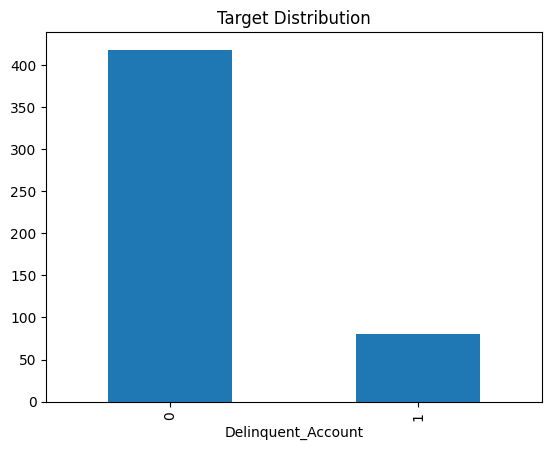

In [ ]:
df['Delinquent_Account'].value_counts().plot(kind='bar')
plt.title("Target Distribution")
plt.show()

Correlation Heatmap

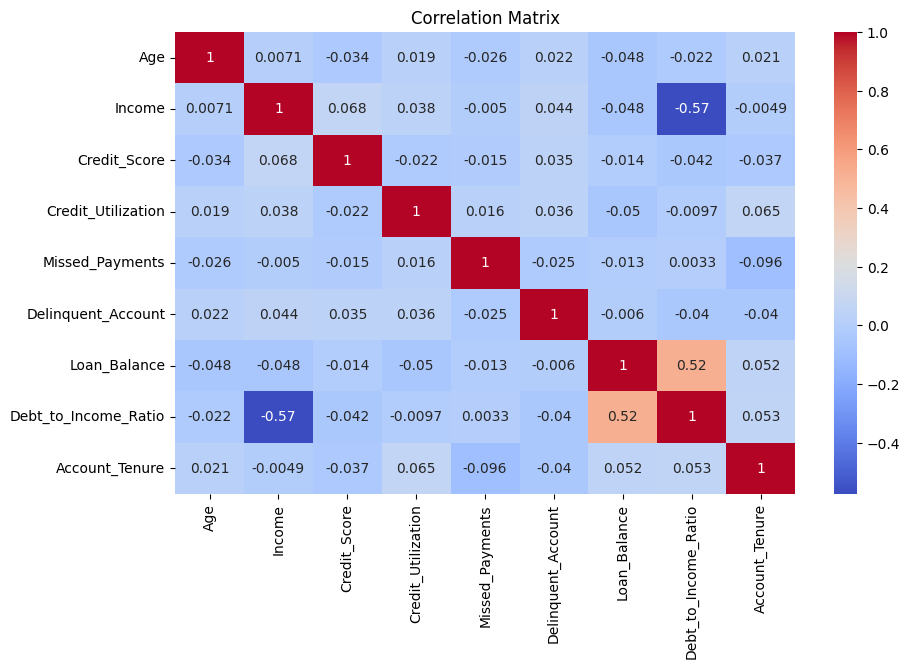

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Credit Segment vs Delinquency

In [ ]:
pd.crosstab(df['Credit_segment'], df['Delinquent_Account'], normalize='index').round(2)*100

Delinquent_Account,0,1
Credit_segment,,
At-risk,84.0,16.0
Moderate,86.0,14.0
Healthy,82.0,18.0
Premium,83.0,17.0


In [ ]:
# Debt to Income Risk Buckets
df['DTI_Bucket'] = pd.cut(df['Debt_to_Income_Ratio'],
                          bins=[0,0.3,0.6,1.0,3],
                          labels=['Low','Medium','High','Very High'])
pd.crosstab(df['DTI_Bucket'], df['Delinquent_Account'], normalize='index')*100

Delinquent_Account,0,1
DTI_Bucket,,
Low,81.976744,18.023256
Medium,84.459459,15.540541
High,85.858586,14.141414
Very High,83.333333,16.666667


Income vs Delinquency

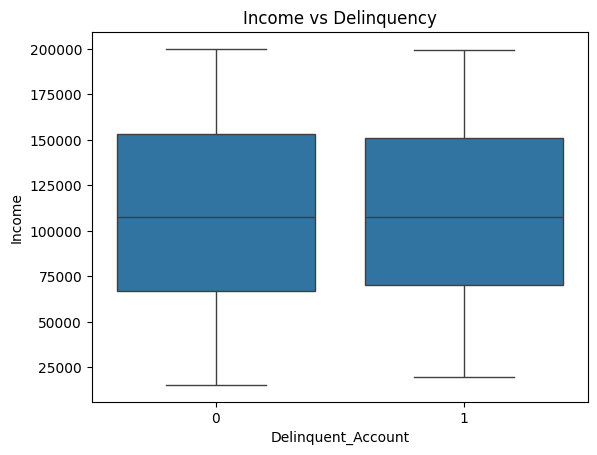

In [ ]:
sns.boxplot(x='Delinquent_Account', y='Income', data=df)
plt.title("Income vs Delinquency")
plt.show()

Employment Status vs Delinquency

In [ ]:
pd.crosstab(df['Employment_Status'], df['Delinquent_Account'], normalize='index')*100

Delinquent_Account,0,1
Employment_Status,,
EMP,85.000000,15.000000
Employed,81.707317,18.292683
Self-employed,83.750000,16.250000
Unemployed,80.645161,19.354839
employed,84.415584,15.584416
retired,88.372093,11.627907


8. DATA PREPARATION FOR MODELING

In [ ]:
target = 'Delinquent_Account'
df= df.drop(['Credit_segment', 'DTI_Bucket'], axis=1)
X = df.drop(['Customer_ID', target], axis=1)
Y = df[target]

Identify Column Types

In [ ]:
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: Index(['Age', 'Income', 'Credit_Score', 'Credit_Utilization',
       'Missed_Payments', 'Loan_Balance', 'Debt_to_Income_Ratio',
       'Account_Tenure'],
      dtype='object')
Categorical Columns: Index(['Employment_Status', 'Credit_Card_Type', 'Location', 'Month_1',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6'],
      dtype='object')


9. TRAIN TEST SPLIT

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)

10. PREPROCESSING PIPELINE

In [ ]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

11. BASELINE MODEL — LOGISTIC REGRESSION

In [ ]:
log_model = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

log_model.fit(X_train, Y_train)

log_pred = log_model.predict(X_test)
log_prob = log_model.predict_proba(X_test)[:,1]

print("Classification_Report :",classification_report(Y_test, log_pred))
print("ROC AUC:", roc_auc_score(Y_test, log_prob))

Classification_Report :               precision    recall  f1-score   support

           0       0.80      0.49      0.61        84
           1       0.12      0.38      0.18        16

    accuracy                           0.47       100
   macro avg       0.46      0.43      0.40       100
weighted avg       0.69      0.47      0.54       100

ROC AUC: 0.46726190476190477


In [ ]:
dt_model = Pipeline([
    ('preprocessing', preprocessor),
    ('model', DecisionTreeClassifier(max_depth=5, class_weight='balanced'))
])
dt_model.fit(X_train, Y_train)
dt_pred = dt_model.predict(X_test)
dt_prob = dt_model.predict_proba(X_test)[:,1]

print("Decision Tree Classification Report:\n", classification_report(Y_test, dt_pred))
print("Decision Tree ROC AUC:", roc_auc_score(Y_test, dt_prob))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(Y_test, dt_pred))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.40      0.54        84
           1       0.15      0.56      0.24        16

    accuracy                           0.43       100
   macro avg       0.49      0.48      0.39       100
weighted avg       0.72      0.43      0.50       100

Decision Tree ROC AUC: 0.47842261904761907
Decision Tree Confusion Matrix:
 [[34 50]
 [ 7  9]]
